In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare Dataset

In [3]:
# Specify the file path
url = 'https://raw.githubusercontent.com/ISSS623-AHA/ISSS623_2024/main/Lecture%202/RRT.csv'

# Read the CSV file into a DataFrame
rrt = pd.read_csv(url)

# Display the structure of the DataFrame
print(rrt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         3000 non-null   int64
 1   Age        3000 non-null   int64
 2   RRT        3000 non-null   int64
 3   AKIN       3000 non-null   int64
 4   SOFA       3000 non-null   int64
 5   Mortality  3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB
None


In [4]:
rrt.head()

,ID,Age,RRT,AKIN,SOFA,Mortality
0,1,67,0,0,1,0
1,2,64,0,0,11,0
2,3,47,0,0,1,0
3,4,56,0,0,10,0
4,5,51,1,0,11,0


## 1.1 Understand the dataset (categorical and continuous columns)

In [4]:
# Define the age categories
bins = [-np.inf, 50, 65, np.inf]
labels = ["Less than 50", "50 to less than 65", "65 and above"]

# Create a new column 'age_category' based on the defined bins and labels
rrt['age_category'] = pd.cut(rrt['Age'], bins=bins, labels=labels)

# Select specific continuous columns
continuous_columns = ['Age','SOFA']

# Select specific categorical columns
categorical_columns = [ 'Mortality','RRT', 'AKIN',  'age_category']

# Summarize continuous columns
continuous_summary = rrt[continuous_columns].describe()

# Summarize categorical columns. categorical_summary = rrt[categorical_columns].
# apply(lambda x: x.value_counts()): Summarizes the specified categorical columns by counting the occurrences of each category.
categorical_summary = rrt[categorical_columns].apply(lambda x: x.value_counts())

# Display the summaries
print("Continuous Columns Summary:")
print(continuous_summary)

print("\nCategorical Columns Summary:")
print(categorical_summary)

Continuous Columns Summary:
               Age         SOFA
count  3000.000000  3000.000000
mean     60.199333     6.171000
std      13.107283     3.612678
min      16.000000     0.000000
25%      54.000000     4.000000
50%      62.000000     7.000000
75%      69.000000     8.000000
max      99.000000    17.000000

Categorical Columns Summary:
                    Mortality     RRT    AKIN  age_category
0                      2872.0  2709.0  2859.0           NaN
1                       128.0   291.0    43.0           NaN
2                         NaN     NaN    60.0           NaN
3                         NaN     NaN    38.0           NaN
50 to less than 65        NaN     NaN     NaN        1378.0
65 and above              NaN     NaN     NaN        1072.0
Less than 50              NaN     NaN     NaN         550.0


# 2. Univariate Analysis - Continuous Response

## 2.1 Correlation Analysis between Age and SOFA (both continuous variables)

Pearson Correlation Coefficient: 0.16017723723479
P-value: 1.0784860854647908e-18


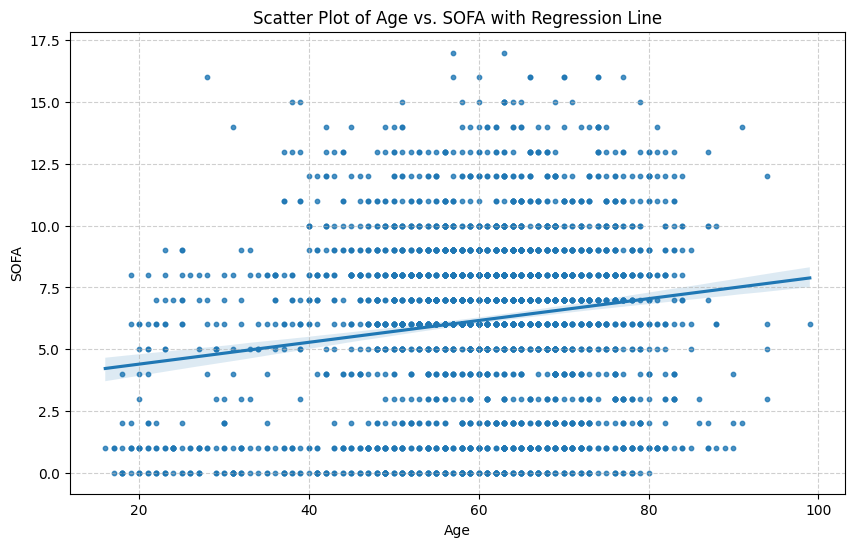

In [5]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
corr_coefficient, p_value = pearsonr(rrt['Age'], rrt['SOFA'])
print(f"Pearson Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='SOFA', data=rrt, scatter_kws={'s':10})
plt.title("Scatter Plot of Age vs. SOFA with Regression Line")
plt.xlabel("Age")
plt.ylabel("SOFA")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2.2 Univariate Analysis of Age as categories

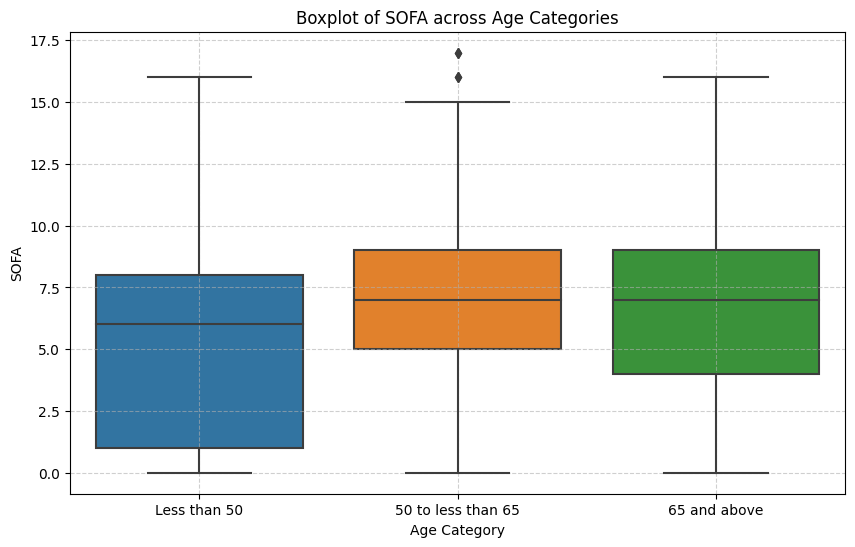

Summary of SOFA Scores:
count    3000.000000
mean        6.171000
std         3.612678
min         0.000000
25%         4.000000
50%         7.000000
75%         8.000000
max        17.000000
Name: SOFA, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_category', y='SOFA', data=rrt)
plt.title("Boxplot of SOFA across Age Categories")
plt.xlabel("Age Category")
plt.ylabel("SOFA")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Summarize the SOFA scores
sofa_summary = rrt['SOFA'].describe()
print("Summary of SOFA Scores:")
print(sofa_summary)

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform one-way ANOVA
model = ols('SOFA ~ age_category', data=rrt).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA result
print("ANOVA Result:")
print(anova_result)

ANOVA Result:
                    sum_sq      df          F        PR(>F)
age_category    846.728569     2.0  33.133248  5.850463e-15
Residual      38294.548431  2997.0        NaN           NaN


### 2.2.1 Evaluating the assumptions for ANOVA:
- Data are Normally Distributed
- Variance within each group is similar (homoscedasticity)
- Data points are Independent

#### Evaluating Normality for the Data


##### Shapiro Wilk Test

- The Shapiro-Wilk test is used to assess the normality of a distribution. It tests the null hypothesis that the data follows a normal distribution.
- Null Hypothesis: The data is normally distributed.
- Alternative Hypothesis: The data is not normally distributed.
- statistics and p-value given for each group

In [8]:
import scipy.stats as stats

# Shapiro-Wilk normality test for each group
for category in rrt['age_category'].unique():
    group_data = rrt[rrt['age_category'] == category]['SOFA']
    stat, p_value = stats.shapiro(group_data)
    print(f"Shapiro-Wilk test for age category {category}:")
    print(f"Statistic: {stat}, p-value: {p_value}\n")

# Results show that all the groups deviate from normality

Shapiro-Wilk test for age category 65 and above:
Statistic: 0.9666324853897095, p-value: 5.664108894773033e-15

Shapiro-Wilk test for age category 50 to less than 65:
Statistic: 0.956000804901123, p-value: 6.033885780374253e-20

Shapiro-Wilk test for age category Less than 50:
Statistic: 0.9195920825004578, p-value: 1.5627932577387212e-16



##### Normal Probability Plot (Visualization)

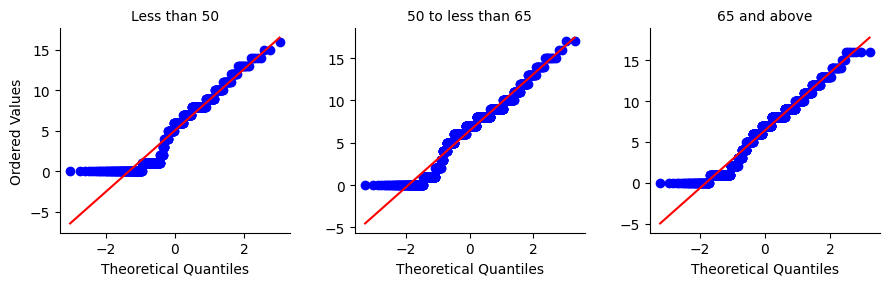

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# A custom function qqplot is defined to create Q-Q plots.
def qqplot(x, **kwargs):
    # gets the current axis to plot on.
    ax = plt.gca()

    # creates the Q-Q plot on the specified axis.
    stats.probplot(x, dist="norm", plot=ax)

    # Set the color of the Q-Q line to red
    ax.get_lines()[1].set_color('r')  

# Q-Q plots for each group
# FacetGrid is used to create a grid of plots for each age_category.
g = sns.FacetGrid(rrt, col="age_category", sharex=False, sharey=False)

# The map method applies the qqplot function to the SOFA data for each group of "age_category".
g.map(qqplot, "SOFA")
g.set_titles("{col_name}")  # Set each subplot title to the corresponding 'age_category'
g.set_axis_labels("Theoretical Quantiles", "Ordered Values")  # Set common x and y labels

plt.show()

##### Test for Homoscedascity across groups

Levene's Test for Homogeneity of Variance
- The main goal of Levene's test is to determine whether different samples (or groups) have equal variances
- Null Hypothesis: The variances across groups are equal.
- Alternative Hypothesis: At least one group's variance is different from the others.
- The test statistic is used to determine whether to reject the null hypothesis. It is compared against an F-distribution with appropriate degrees of freedom

In [10]:
from scipy.stats import levene

# Perform Levene's test
# The *(...) syntax is used to unpack the groups into the function arguments for levene function.
stat, p_value = levene(*(rrt[rrt['age_category'] == category]['SOFA'] for category in rrt['age_category'].unique()))
print("Levene's test for homogeneity of variances:")
print(f"Statistic: {stat}, p-value: {p_value}")

Levene's test for homogeneity of variances:
Statistic: 23.643097233845474, p-value: 6.487766607754169e-11


### 2.2.2 ANOVA Assumptions are not met, use Kruskal Wallis test
- non-parametric alternative for comparing the distributions of a continuous variable across multiple groups in one-way ANOVA. 
- extension of the Mann-Whitney U test (non-parametric alternative to t-test) to more than two groups
- It does not assume a normal distribution of the data and is based on the ranks of the data rather than the actual values.
- Null Hypothesis: The populations from which the samples originate have the same distribution (i.e., the medians of the groups are equal).
- Alternative Hypothesis: At least one of the populations has a different distribution (i.e., at least one median is different).


In [11]:
# Import the kruskal function from the scipy.stats module to perform the Kruskal-Wallis test.
from scipy.stats import kruskal

# Perform Kruskal-Wallis test
# The kruskal function requires separate arrays for each group. 
# The groups list comprehension extracts the SOFA scores for each unique age_category.
groups = [rrt[rrt['age_category'] == category]['SOFA'] for category in rrt['age_category'].unique()]

# The *groups syntax unpacks the list into separate arguments for the kruskal function.
stat, p_value = kruskal(*groups)

print("Kruskal-Wallis test for differences in SOFA scores across age categories:")
print(f"Statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis test for differences in SOFA scores across age categories:
Statistic: 59.23636740136028, p-value: 1.3708383791320986e-13


#### Final Conclusion is still the same as ANOVA

## 3. Univariate Analysis - Categorical Response

We look at Age association with the response of Mortality" without concerning ourselves with the other covariates in a univariate analysis. We use the age categories to evaluate the association.

In [12]:
# Convert 'Mortality' to categorical type
rrt['Mortality'] = rrt['Mortality'].astype('category')
print(rrt['Mortality'].unique())
rrt.info()

[0, 1]
Categories (2, int64): [0, 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            3000 non-null   int64   
 1   Age           3000 non-null   int64   
 2   RRT           3000 non-null   int64   
 3   AKIN          3000 non-null   int64   
 4   SOFA          3000 non-null   int64   
 5   Mortality     3000 non-null   category
 6   age_category  3000 non-null   category
dtypes: category(2), int64(5)
memory usage: 123.4 KB


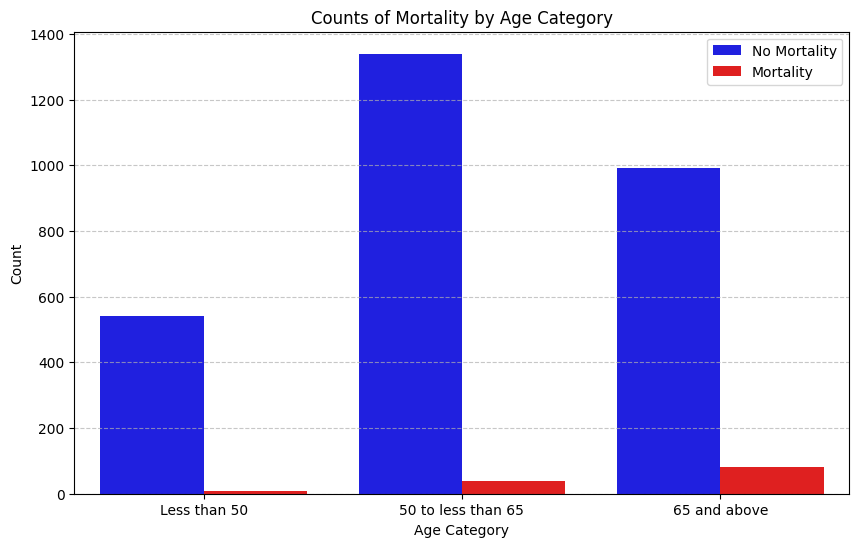

In [13]:
# Visualize the categorical counts first
# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=rrt, x='age_category', hue='Mortality', palette={0: 'blue', 1: 'red'}, dodge=True)

# Customize the plot
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(labels=['No Mortality', 'Mortality'])
plt.title('Counts of Mortality by Age Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Create a pivot table for stacking
pivot_table = rrt.pivot_table(index='age_category', columns='Mortality', aggfunc='size', fill_value=0)
pivot_table

Mortality,0,1
age_category,,
Less than 50,541,9
50 to less than 65,1340,38
65 and above,991,81


In [15]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(rrt['age_category'], rrt['Mortality'])
print(contingency_table)

# Perform chi-square test of association
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test of Association between Mortality and Age Category")
print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Mortality              0   1
age_category                
Less than 50         541   9
50 to less than 65  1340  38
65 and above         991  81
Chi-Square Test of Association between Mortality and Age Category
Chi2 Statistic: 45.39393399646765
P-value: 1.389416579017139e-10
Degrees of Freedom: 2
Expected Frequencies:
[[ 526.53333333   23.46666667]
 [1319.20533333   58.79466667]
 [1026.26133333   45.73866667]]


# 4. Multivariate Analysis for Categorical Response "Mortality"

In [16]:
# Define the categorical columns to be used in this analysis
categorical_columns = ['RRT', 'Mortality', 'AKIN', 'age_category']


In [17]:
# See what are the unique categories present in the categorical columns
summary_cat_data = {
    'Column': [],
    'Number of Unique Values': [],
    'Unique Values': []
}

for column in categorical_columns:
    summary_cat_data['Column'].append(column)
    summary_cat_data['Number of Unique Values'].append(rrt[column].nunique())
    summary_cat_data['Unique Values'].append(rrt[column].unique())

summary_df = pd.DataFrame(summary_cat_data)
summary_df
# There are no NaN values in the columns

,Column,Number of Unique Values,Unique Values
0,RRT,2,"[0, 1]"
1,Mortality,2,"[0, 1] Categories (2, int64): [0, 1]"
2,AKIN,4,"[0, 2, 3, 1]"
3,age_category,3,"['65 and above', '50 to less than 65', 'Less t..."


## 4.1 One-hot encoding for Logistic Regression Model

In [18]:
# AKIN has 4 categories and age_category has 3 categories, whilst the others are binary
# We need to one-hot encode AKIN and age_category

# One-hot encode the 'AKIN' and 'age_category' columns with drop_first to prevent multicollinearity
encoded_data = pd.get_dummies(rrt, columns=['AKIN', 'age_category'], drop_first=True)
encoded_data.head()

,ID,Age,RRT,SOFA,Mortality,AKIN_1,AKIN_2,AKIN_3,age_category_50 to less than 65,age_category_65 and above
0,1,67,0,1,0,False,False,False,False,True
1,2,64,0,11,0,False,False,False,True,False
2,3,47,0,1,0,False,False,False,False,False
3,4,56,0,10,0,False,False,False,True,False
4,5,51,1,11,0,False,False,False,True,False


In [38]:
encoded_data.columns

Index(['ID', 'Age', 'RRT', 'SOFA', 'Mortality', 'AKIN_1', 'AKIN_2', 'AKIN_3',
       'age_category_50 to less than 65', 'age_category_65 and above'],
      dtype='object')

## 4.2 Estimate the Logistic Regression Model

In [19]:
import statsmodels.api as sm

# Define the variables for the logistic regression model
X = encoded_data[['RRT', 'SOFA', 'AKIN_1', 'AKIN_2', 'AKIN_3', 'age_category_50 to less than 65', 'age_category_65 and above']]
y = encoded_data['Mortality']

# Convert the data to ensure compatibility with the logistic regression model package
X = X.astype(float)
y = y.astype(float)

X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary of the logistic regression model
summary = result.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.106587
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Mortality   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2992
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Jul 2024   Pseudo R-squ.:                  0.3955
Time:                        14:27:27   Log-Likelihood:                -319.76
converged:                       True   LL-Null:                       -528.98
Covariance Type:            nonrobust   LLR p-value:                 2.629e-86
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -10.0967      0.689    -14.649  

In the context of a logistic regression model, the coefficients represent the log-odds of the outcome (in this case, Mortality) associated with a one-unit change in the predictor variables. Here's a detailed interpretation of the coefficient estimates:

1. **Intercept (const):**
   - Coefficient: -10.0967
   - Interpretation: This is the log-odds of Mortality when all predictor variables are zero. Since the value is highly negative, it indicates that the baseline log-odds of Mortality is very low.

2. **RRT:**
   - Coefficient: -1.0074
   - Interpretation: A one-unit increase in RRT (moving from 0 to 1, where 1 indicates the presence of RRT) decreases the log-odds of Mortality by 1.0074. This translates to an odds ratio of \( e^{-1.0074} \approx 0.365 \), indicating that the presence of RRT is associated with a 63.5% decrease in the odds of Mortality compared to its absence, holding other factors constant.

3. **SOFA:**
   - Coefficient: 0.6656
   - Interpretation: A one-unit increase in the SOFA score increases the log-odds of Mortality by 0.6656. This translates to an odds ratio of \( e^{0.6656} \approx 1.946 \), indicating that each additional point in the SOFA score nearly doubles the odds of Mortality, holding other factors constant.

4. **AKIN_1:**
   - Coefficient: 1.4085
   - Interpretation: A one-unit increase in AKIN_1 (presence of AKIN stage 1 compared to stage 0 - reference stage) increases the log-odds of Mortality by 1.4085. This translates to an odds ratio of \( e^{1.4085} \approx 4.089 \), indicating that the presence of AKIN stage 1 increases the odds of Mortality by approximately 308.9%, holding other factors constant.

5. **AKIN_2:**
   - Coefficient: 1.6012
   - Interpretation: A one-unit increase in AKIN_2 (presence of AKIN stage 2  compared to stage 0 ) increases the log-odds of Mortality by 1.6012. This translates to an odds ratio of \( e^{1.6012} \approx 4.956 \), indicating that the presence of AKIN stage 2 increases the odds of Mortality by approximately 395.6%, holding other factors constant.

6. **AKIN_3:**
   - Coefficient: 0.6194
   - Interpretation: A one-unit increase in AKIN_3 (presence of AKIN stage 3  compared to stage 0) increases the log-odds of Mortality by 0.6194. This translates to an odds ratio of \( e^{0.6194} \approx 1.858 \), indicating that the presence of AKIN stage 3 increases the odds of Mortality by approximately 85.8%, holding other factors constant. **However, this result is not statistically significant (p-value = 0.211)**.

7. **age_category_50 to less than 65:**
   - Coefficient: 0.4314
   - Interpretation: Being in the age category of 50 to less than 65 years increases the log-odds of Mortality by 0.4314 compared to being less than 50 years old. This translates to an odds ratio of \( e^{0.4314} \approx 1.539 \), indicating that being in this age category increases the odds of Mortality by approximately 53.9%, holding other factors constant. However, this result is not statistically significant (p-value = 0.317).

8. **age_category_65 and above:**
   - Coefficient: 1.7249
   - Interpretation: Being in the age category of 65 years and above increases the log-odds of Mortality by 1.7249 compared to being less than 50 years old. This translates to an odds ratio of \( e^{1.7249} \approx 5.612 \), indicating that being in this age category increases the odds of Mortality by approximately 461.2%, holding other factors constant.

In summary, significant predictors of Mortality in this model include SOFA score, presence of AKIN stage 1 and 2, and being in the age category of 65 and above. The presence of RRT is associated with a significant decrease in the odds of Mortality.

## 4.3 Handling Imbalanced Data (Outcome: Mortality)

In [20]:
# Check the distribution of the response variable
mortality_distribution = y.value_counts(normalize=True)
print("\nMortality Distribution:\n", mortality_distribution)


Mortality Distribution:
 Mortality
0.0    0.957333
1.0    0.042667
Name: proportion, dtype: float64


- Data is highly imbalanced in terms of the Mortality outcome. 
- This can lead to biased results because the model might be more influenced by the majority class. 
- To address this, we can use an oversampling technique for the minority class.
- Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to balance the classes.


In [41]:
!pip install imblearn

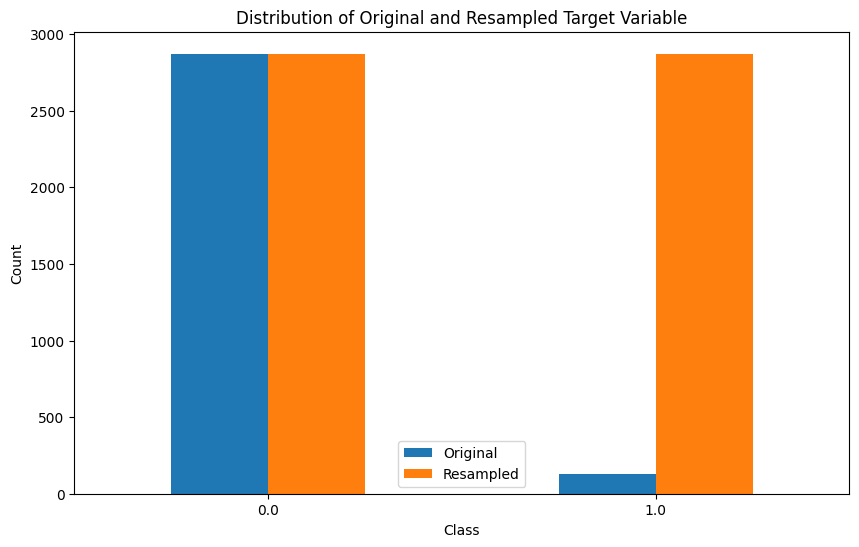

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Original distribution of y
y_counts = Counter(y)
y_resampled_counts = Counter(y_resampled)

# Create a DataFrame for easy plotting
df_counts = pd.DataFrame.from_dict(y_counts, orient='index', columns=['Original'])
df_counts['Resampled'] = pd.Series(y_resampled_counts)

# Plot the distributions
df_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Original and Resampled Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Fit the logistic regression model on the resampled data
logit_model_resampled = sm.Logit(y_resampled, X_resampled)
result_resampled = logit_model_resampled.fit()

# Display the summary of the logistic regression model
summary_resampled = result_resampled.summary()
print(summary_resampled)

Optimization terminated successfully.
         Current function value: 0.395711
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Mortality   No. Observations:                 5744
Model:                          Logit   Df Residuals:                     5736
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Jul 2024   Pseudo R-squ.:                  0.4291
Time:                        14:27:40   Log-Likelihood:                -2273.0
converged:                       True   LL-Null:                       -3981.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -5.6579      0.194    -29.135  

The results are different from the earlier analysis without resampling. 
Here's a detailed interpretation of the coefficient estimates:

1. **Intercept (const):**
   - Coefficient: -5.6579 
   - Interpretation: This is the log-odds of Mortality when all predictor variables are zero. The value is less negative then previously given the oversampled data. It still indicate a very low baseline log-odds of mortality when no risk factors are present.

2. **RRT:**
   - Coefficient: -0.6851 
   - Interpretation: A one-unit increase in RRT (moving from 0 to 1, where 1 indicates the presence of RRT) decreases the log-odds of Mortality by 0.6851. This translates to an odds ratio of \( e^{-0.6851} \approx 0.504 \), indicating that the presence of RRT is associated with a (1-0.504 = 0.496) decrease in the odds of Mortality compared to its absence, holding other factors constant.

3. **SOFA:**
   - Coefficient: 0.5004
   - Interpretation: A one-unit increase in the SOFA score increases the log-odds of Mortality by 0.5004. This translates to an odds ratio of \( e^{0.5004} \approx 1.649 \), indicating that each additional point in the SOFA score increases the odds of Mortality by 64.9%, holding other factors constant.

4. **AKIN_1:**
   - Coefficient: 1.1969
   - Interpretation: Presence of AKIN stage 1 increases the log-odds of mortality by 1.1969 compared to the reference category (AKIN stage 0). This translates to an odds ratio of 3.309, indicating that AKIN stage 1 increases the odds of mortality by approximately 230.9%, holding other factors constant. This result is statistically significant at 0.005 significance (p-value = 0.000).

5. **AKIN_2:**
   - Coefficient: 1.2760
   - Interpretation: Presence of AKIN stage 2 increases the log-odds of mortality by 1.2760 compared to the reference category (AKIN stage 0). This translates to an odds ratio of 3.582, indicating that AKIN stage 2 increases the odds of mortality by approximately 258.2%, holding other factors constant. This result is statistically significant at 0.005 significance (p-value = 0.000).

6. **AKIN_3:**
   - Coefficient: 0.7114
   - Interpretation: Presence of AKIN stage 3 increases the log-odds of mortality by 0.7114 compared to the reference category (AKIN stage 0). This translates to an odds ratio of 2.037, indicating that AKIN stage 3 increases the odds of mortality by approximately 103.7%, holding other factors constant. This result is **not statistically significant at 0.005 significance** (p-value = 0.007). There may be insufficient evidence in the dataset to conclude this.

7. **age_category_50 to less than 65:**
   - Coefficient: 0.6918
   - Interpretation: Being in the age category of 50 to less than 65 years increases the log-odds of mortality by 0.6918 compared to being less than 50 years old. This translates to an odds ratio of 1.997, indicating that this age category increases the odds of mortality by approximately 99.7%, holding other factors constant. This result is statistically significant (p-value = 0.000).

8. **age_category_65 and above:**
   - Coefficient: 1.7886
   - Interpretation: Being in the age category of 65 years and above increases the log-odds of mortality by 1.7886 compared to being less than 50 years old. This translates to an odds ratio of 5.975, indicating that this age category increases the odds of mortality by approximately 497.5%, holding other factors constant. This result is statistically significant (p-value = 0.000).

In summary, significant predictors of Mortality in this model include SOFA score, presence of AKIN stage 1 and 2, and being in the age category of 65 and above. The presence of RRT is associated with a significant decrease in the odds of Mortality (adjusted for all the other factor).

## 4.3 Checking the quality of the models

- Objective is for inferencing, hence we use all the data to derive the effect sizes
- However, for validation purposes, it is useful to look at how well the model predict the outcome. This requires the definition of Training and Test datasets.
- We will evaluate the quality of fit via following tests here:
1. Goodness-of-fit test using Hosmer Lemeshow Test
2. Pseudo R-squared
3. Confusion Matrix 
4. Other Validation Metrics (AUROC)


In [23]:
# Calculate predicted probabilities
y_pred = result_resampled.predict(X_resampled)

### 4.3.1 Hosmer Lemeshow Test

In [24]:
from scipy.stats import chi2

def hosmer_lemeshow(y_true, y_pred, g=10):
    # Create a DataFrame with true and predicted values
    # y_true: The true binary outcomes (0 or 1).
    # y_pred: The predicted probabilities from the logistic regression model.
    data = pd.DataFrame({'true': y_true, 'pred': y_pred})
    
    # Cut the predicted probabilities into g quantile groups
    # g: The number of groups to divide the predicted probabilities into (default is 10, decile).
    data['cut'] = pd.qcut(data['pred'], g, duplicates='drop')  # Handle possible duplicate bin edges
    
    # Group by the quantile groups and calculate observed and expected counts
    grouped = data.groupby('cut')
    # observed: The sum of the true outcomes (number of true positives) in each group.
    observed = grouped['true'].sum()
    # expected: The sum of the predicted probabilities in each group, which represents the expected number of positives.
    expected = grouped['pred'].sum()
    # The total counts of observations in each quantile group are also calculated.
    total = grouped.size()
    
    # Calculate the Hosmer-Lemeshow statistic
    hl_stat = ((observed - expected) ** 2 / expected).sum()

    # The p-value is calculated by comparing the Hosmer-Lemeshow statistic to a chi-squared distribution with g - 2 degrees of freedom.
    # 1 - chi2.cdf(hl_stat, g - 2) gives the p-value, indicating the probability of observing such a discrepancy if the model fits well.
    p_value = 1 - chi2.cdf(hl_stat, g - 2)
    
    # Return the statistic, p-value, observed and expected values, and total counts
    return hl_stat, p_value, observed, expected, total

def plot_hosmer_lemeshow(y_true, y_pred, g=10):
    # Get the Hosmer-Lemeshow statistic, p-value, observed and expected values, and total counts
    hl_stat, p_value, observed, expected, total = hosmer_lemeshow(y_true, y_pred, g)

    # Print the Hosmer-Lemeshow statistic and p-value
    # The Hosmer-Lemeshow statistic is a measure of the discrepancy between the observed and expected counts in each quantile group of the predicted probabilities.
    # A higher value indicates a greater discrepancy between observed and expected counts, suggesting a poor fit of the logistic regression model.
    print(f"Hosmer-Lemeshow statistic: {hl_stat:.2f}")
    
    # A low p-value (typically less than 0.05) indicates that the discrepancy between the observed and expected counts is statistically significant, 
    # suggesting that the model does not fit the data well.
    print(f"P-value: {p_value:.2f}")
    
    # Calculate the observed and expected proportions
    # observed_proportions = observed / total: Calculates the observed proportions.
    observed_proportions = observed / total

    # expected_proportions = expected / total: Calculates the expected proportions.
    expected_proportions = expected / total
    
    # Plot the observed vs. expected proportions (Calibration Curve)
    plt.figure(figsize=(10, 6))
    plt.scatter(expected_proportions, observed_proportions, c='blue', label='Quantile Groups')
    plt.plot([0, 1], [0, 1], 'r--', label='Perfect Fit Line')
    plt.xlabel('Predicted Proportion')
    plt.ylabel('Observed Proportion')
    plt.title(f'Hosmer-Lemeshow Goodness-of-Fit (HL Statistic: {hl_stat:.2f}, p-value: {p_value:.2f})')
    plt.legend()
    plt.grid(True)
    plt.show()

Hosmer-Lemeshow statistic: 68.33
P-value: 0.00


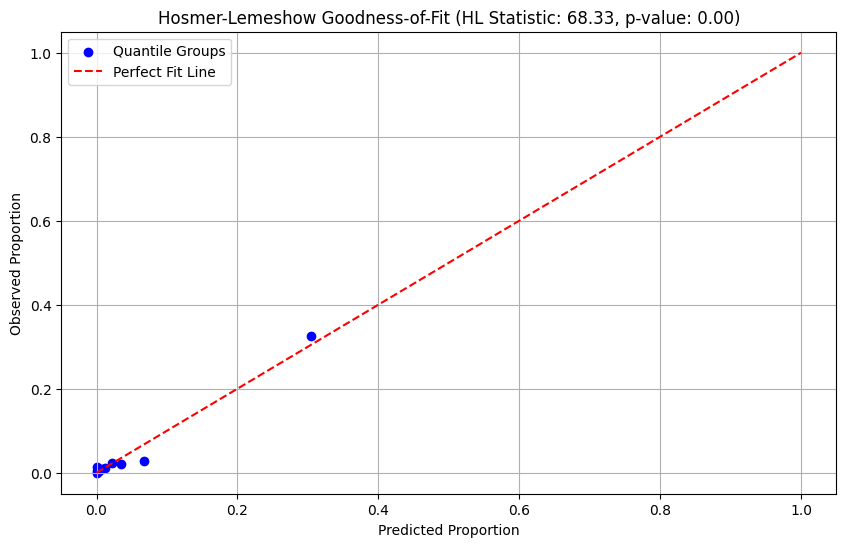

In [25]:
# for non-resampled data
y_pred = result.predict(X)
plot_hosmer_lemeshow(y, y_pred)


Hosmer-Lemeshow statistic: 241.25
P-value: 0.00


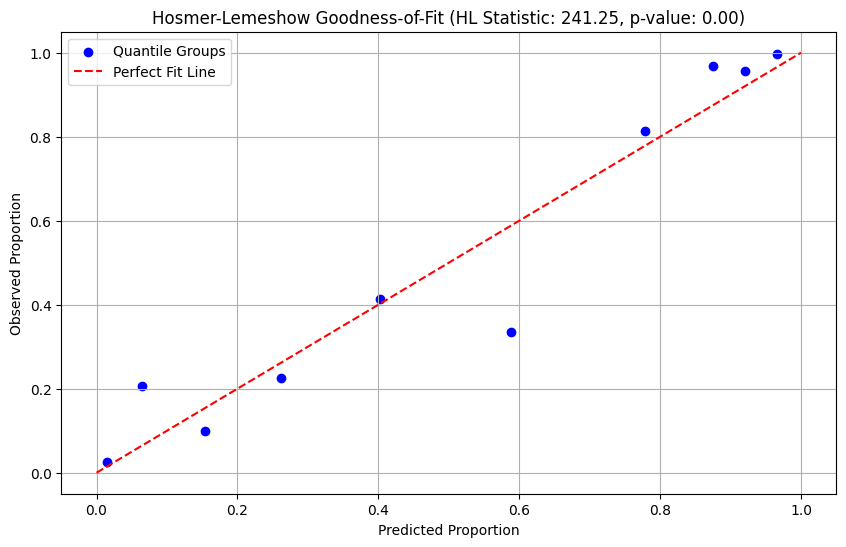

In [26]:
# for over-sampled data
y_pred = result_resampled.predict(X_resampled)
plot_hosmer_lemeshow(y_resampled, y_pred)

# 4.3.2 Pseudo R-Squared

In [27]:
# Pseudo R-squared is given by the summary of the model - for non-resampled model
print(summary)

                           Logit Regression Results                           
Dep. Variable:              Mortality   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2992
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Jul 2024   Pseudo R-squ.:                  0.3955
Time:                        14:27:27   Log-Likelihood:                -319.76
converged:                       True   LL-Null:                       -528.98
Covariance Type:            nonrobust   LLR p-value:                 2.629e-86
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -10.0967      0.689    -14.649      0.000     -11.448      -8.746
RRT                                -1.0074      0.289     -3.482    

In [28]:
# Pseudo R-squared is given by the summary of the model - for resampled model
print(summary_resampled)

# Pseudo R-squared has improved in the resampled model

                           Logit Regression Results                           
Dep. Variable:              Mortality   No. Observations:                 5744
Model:                          Logit   Df Residuals:                     5736
Method:                           MLE   Df Model:                            7
Date:                Mon, 08 Jul 2024   Pseudo R-squ.:                  0.4291
Time:                        14:27:40   Log-Likelihood:                -2273.0
converged:                       True   LL-Null:                       -3981.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -5.6579      0.194    -29.135      0.000      -6.039      -5.277
RRT                                -0.6851      0.115     -5.963    

### 4.3.3 Using Confusion Matrix

- We usually train the model with Train data and evaluate the model using the test data.
- However, in this case, we evaluate the accuracy without the train and test data first. 
- We will look at the concept of Train and Test set in the next lecture
- Assume threshold to classify 0 vs 1 is probability = 0.5

In [29]:
# For predictions without resampling

from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
# Predict the probabilities of the positive class (Mortality = 1)
y_pred_prob = result.predict(X)

# Convert probabilities to binary predictions using 0.5 as the threshold
y_pred = (y_pred_prob >= 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Create a DataFrame for the confusion matrix with labeled rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# extract TN, TP, FN, FP
tn, fp, fn, tp = conf_matrix.ravel()

# Evaluate accuracy, sensitivity and specificity
accuracy = (tn+tp)/(tn+tp+fn+fp)
sensitivity = tp / (tp + fn) # also recall for positive class
specificity = tn / (tn + fp) # also recall for negative class

print(conf_matrix_df)
print(f"Sensitivity: {sensitivity:.5f}")
print(f"Specificity: {specificity:.5f}")
print(f"Accuracy: {accuracy:.5f}")

# Results are biased towards the majority class
# recall for negative class is much better
# Why is this an issue for the prediction of Mortality?

          Predicted 0  Predicted 1
Actual 0         2861           11
Actual 1           89           39
Sensitivity: 0.30469
Specificity: 0.99617
Accuracy: 0.96667


In [30]:
# For predictions with SMOTE oversampling
# Predict the probabilities of the positive class (Mortality = 1)
y_pred_prob = result_resampled.predict(X)

# Convert probabilities to binary predictions using 0.5 as the threshold
y_pred = (y_pred_prob >= 0.5).astype(int)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Create a DataFrame for the confusion matrix with labeled rows and columns
conf_matrix_df_resampled = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# extract TN, TP, FN, FP
tn, fp, fn, tp = conf_matrix.ravel()

# Evaluate accuracy, sensitivity and specificity
accuracy = (tn+tp)/(tn+tp+fn+fp)
sensitivity = tp / (tp + fn) # also recall for positive class
specificity = tn / (tn + fp) # also recall for negative class

print(conf_matrix_df_resampled)
print(f"Sensitivity: {sensitivity:.5f}")
print(f"Specificity: {specificity:.5f}")
print(f"Accuracy: {accuracy:.5f}")

# Results are less biased


          Predicted 0  Predicted 1
Actual 0         2332          540
Actual 1           24          104
Sensitivity: 0.81250
Specificity: 0.81198
Accuracy: 0.81200


### 4.3.4 Using AUROC

- Confusion matrix, accuracy, sensitivity and specificity are all threshold dependent. We assumed threshold of p>=0.5 for Class 1. 
- All these values can change with different thresholds. 
- AUROC evaluate the area under the receiver operating curve without a need to specify the threshold.



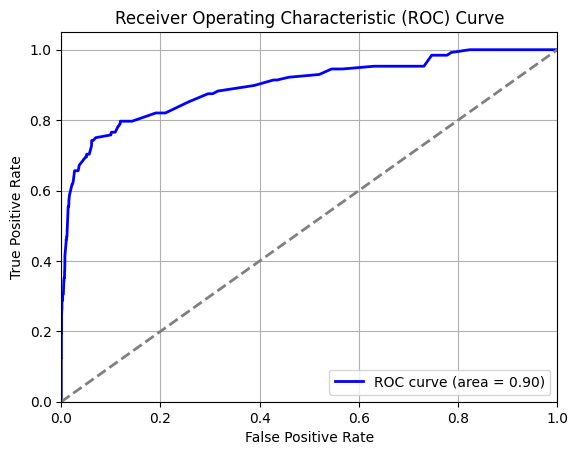

AUROC: 0.89793


In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

# For original non-resampled data
y_pred_prob = result.predict(X)

# Calculate AUROC
auroc = roc_auc_score(y, y_pred_prob)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


print(f"AUROC: {auroc:.5f}")

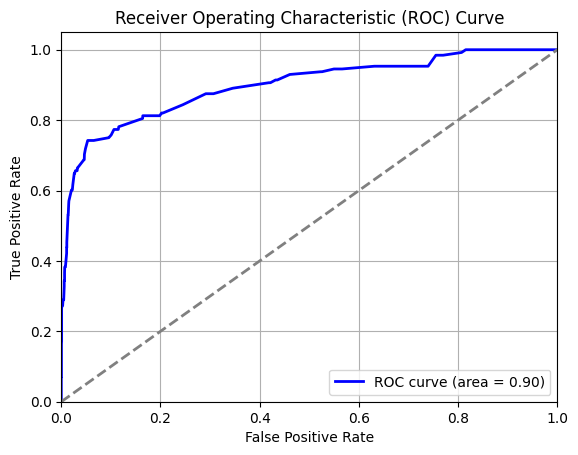

AUROC: 0.89764


In [33]:
# For original SMOTE-oversampled data
y_pred_prob = result_resampled.predict(X)

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# Calculate AUROC
auroc = roc_auc_score(y, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auroc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


print(f"AUROC: {auroc:.5f}")